In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import scipy.stats as sts


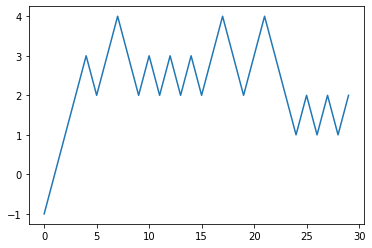

In [7]:
def flip(p):
    step = 0
    if random.random() < p:
        step = 1 #right
    else:
        step = -1  #left step
    return step

total = 30
path = []
start = 0
for i in range(30):
  start = start + flip(0.6)
  path.append(start)
plt.plot(list(range(total)),path)

(array([ 4.,  4., 36., 22., 29., 58., 28., 12.,  3.,  4.]),
 array([-8. , -5.2, -2.4,  0.4,  3.2,  6. ,  8.8, 11.6, 14.4, 17.2, 20. ]),
 <a list of 10 Patch objects>)

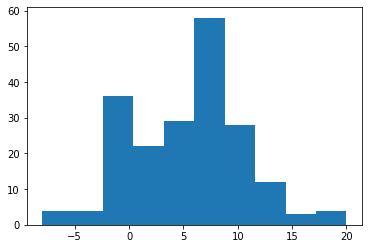

In [8]:
N = 200
histogram = []
for j in range(N):
    start = 0
    for i in range(total):
        start = start + flip(0.6)
    histogram.append(start)
plt.hist(histogram)

In [9]:
np.mean(histogram)

5.23

In [11]:
np.var(histogram)

25.2271

In [18]:

# R=zeros(1,2000000); % vector of 2,000,000 zeros
# i=1; R(i)=100; % gambler’s initial fortune
# while( R(i)>0 &R(i)<2100 )
#i=i+1;
#W = (rand <0.5); % random value of 0 or 1
#W = 2*W - 1; % random value of +/-1
#R(i)= R(i-1)+W; % gamblers new fortune
#end
#> plot(1:length(R),R) % plot R against its index
#> %%% run for investigating running time
#> for j=1:20
#> i=1; R(i)=100;
#> while( R(i)>0 &R(i)<2100 )
#i=i+1;
#W = 2*(rand <0.5)-1;
#R(i)= R(i-1)+W;
#end
#> T(j)=i
#> end
#> hist(T)

In [23]:
def gamblertime(start, time):
    balance = [start]
    for i in range(time):
        w = np.random.randint(2)
        balance.append(balance[-1]+(2*w-1))
        if balance[-1] < 0:
            break
    return balance

13773.13


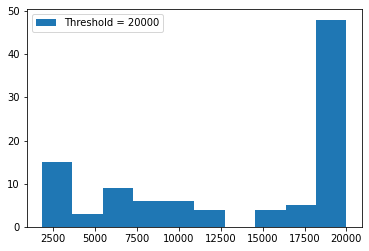

19522.27


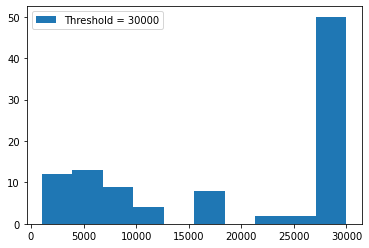

23172.64


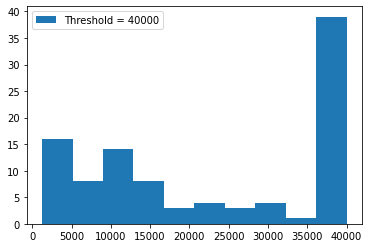

In [28]:
for i in range(20000,50000,10000):
    hist = []
    for x in range(100):
        hist.append(len(gamblertime(100,i)))
    print(np.mean(hist))
    plt.hist(hist, label=(f'Threshold = {i}'))
    plt.legend()
    plt.show()

The thresholds set a bound on how long the game will be played. I'm not sure how it is adding bias, but even while running time-based experiments the game would go on longer since there is the possibility of winning more. As we increase the bound, the expected earnings == mean keeps decreasing as a ratio of the threshold, showcasing the larger possibility of losing money.